In [1]:
import pandas as pd

raw_dataset = pd.read_csv("../movie.metadata.tsv", sep='\t', header=None)
raw_dataset.columns = ['Movie ID', 1, 2, 3, 4, 5, 6, 7, 'Genre']
clean_dataset = pd.read_csv("../preprocessed_dataset.csv")

In [2]:
import json

genres = []

for i in raw_dataset["Genre"]:
    genres.append(list(json.loads(i).values()))

raw_dataset["Genre"] = genres

In [9]:
import nltk

def get_largest_genres(genres: list):
    freq_dist_genres = nltk.FreqDist(genres)
    df_genres = pd.DataFrame({
        'Genre': list(freq_dist_genres.keys()), 
        'Count': list(freq_dist_genres.values())
    })
    return df_genres.nlargest(columns="Count", n = 25)

raw_largest_genres = get_largest_genres(sum(raw_dataset["Genre"], []))
general_largest_genres = get_largest_genres(clean_dataset["General genre"])
specific_largest_genres = get_largest_genres(clean_dataset["Specific genre"])

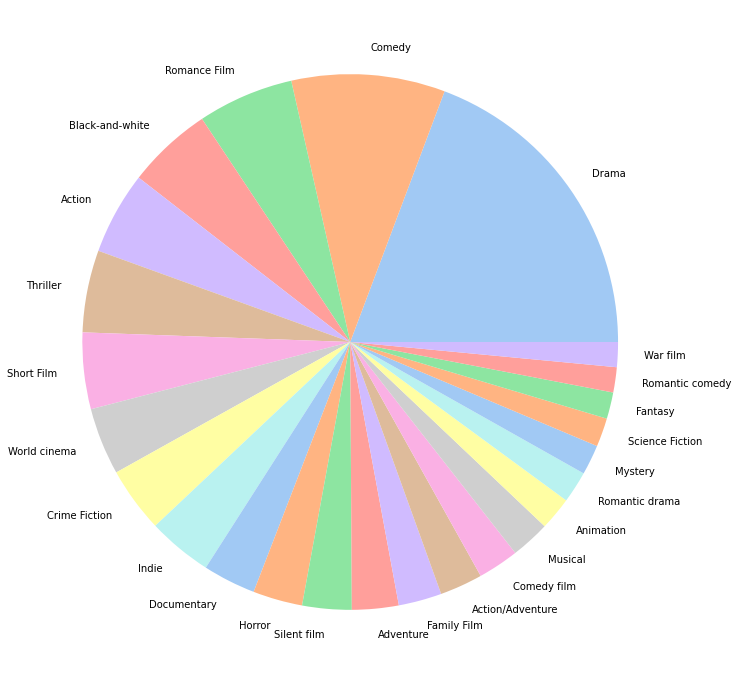

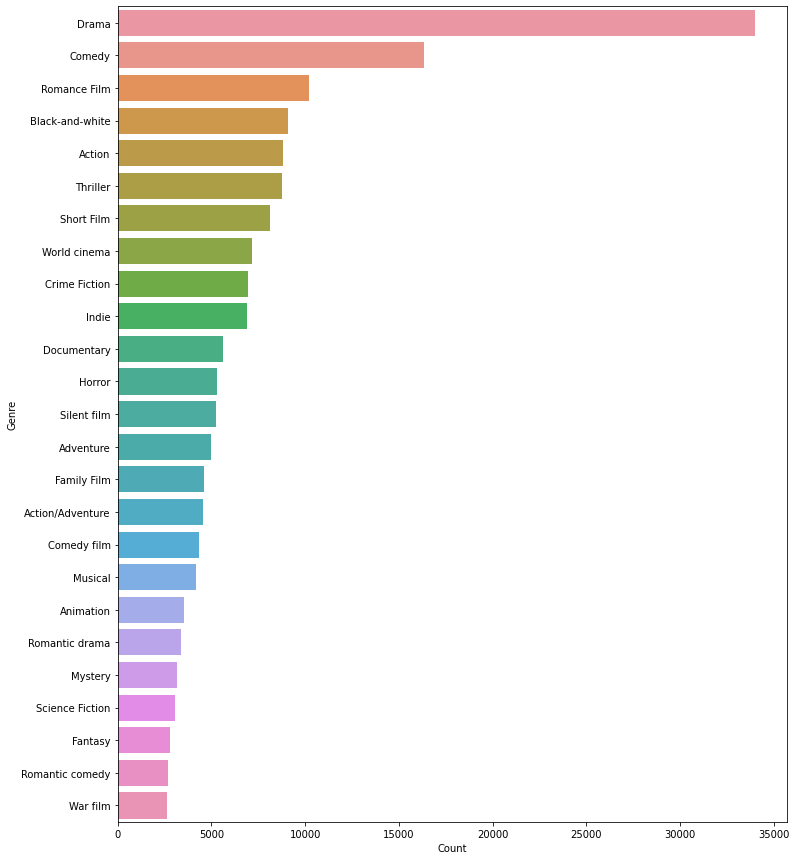

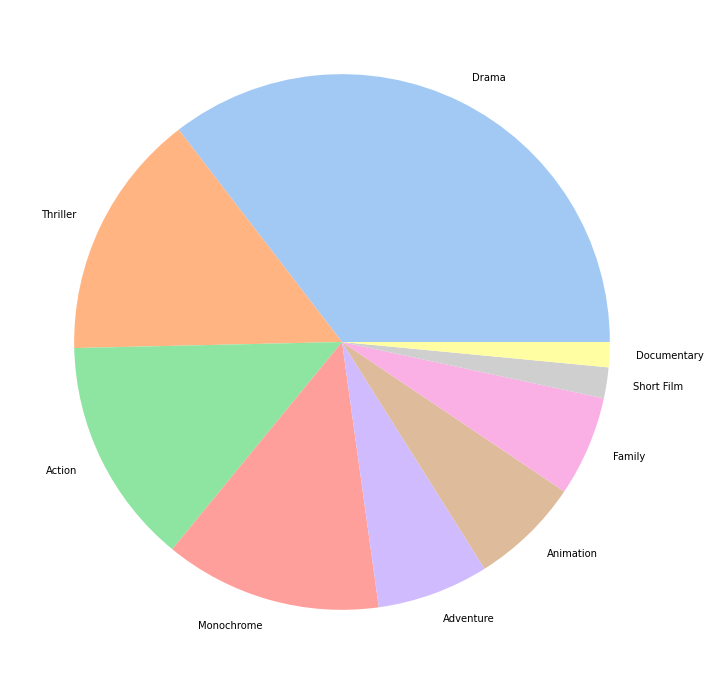

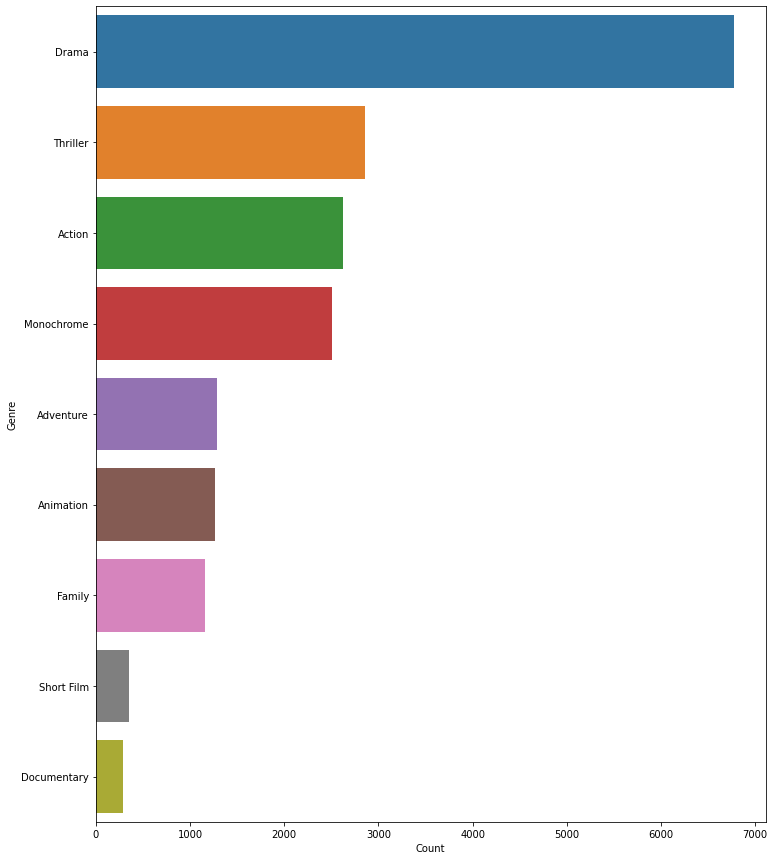

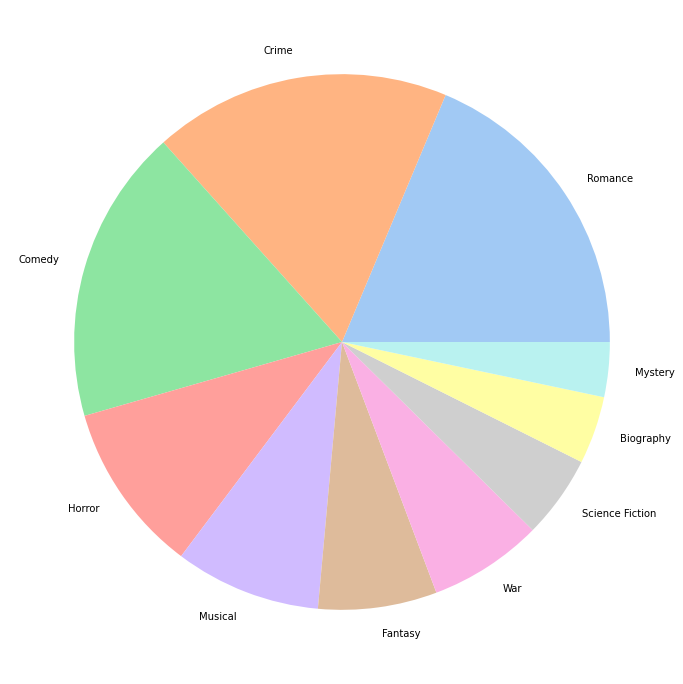

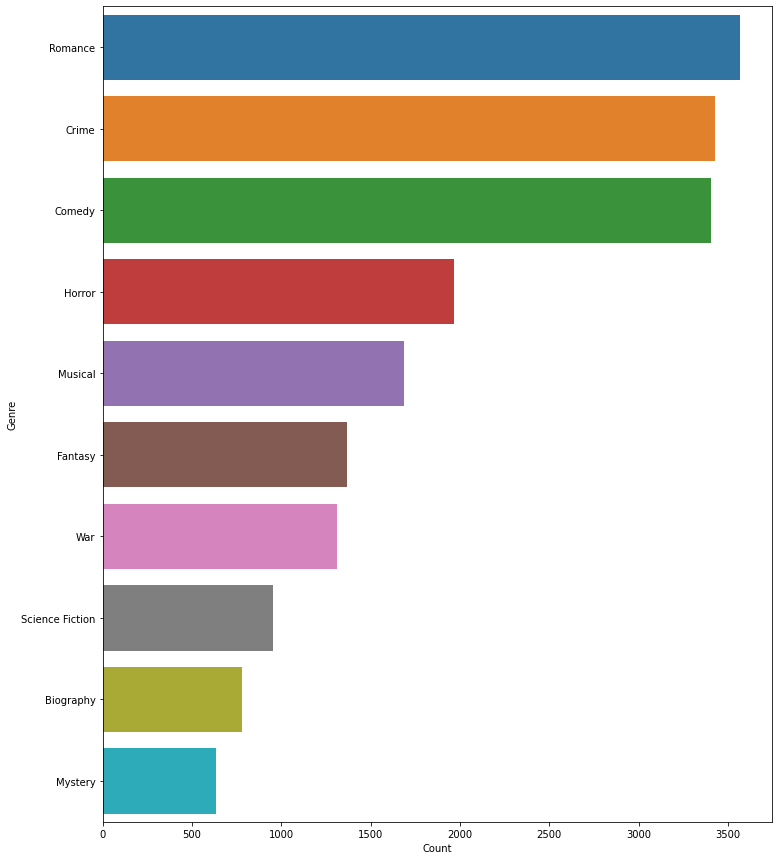

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_genres(genres: list):    
    # Data for plots
    num_genres = genres["Count"]
    labels = genres["Genre"]

    # Pie chart
    colors = sns.color_palette('pastel')[0:25]
    plt.rcParams['figure.facecolor'] = "white"
    plt.figure(figsize=(12,15))
    pie = plt.pie(num_genres, labels=labels, colors=colors)
    plt.show()

    # Bar plot
    plt.figure(figsize=(12,15)) 
    ax = sns.barplot(data=genres, x= "Count", y = "Genre")
    plt.show()

plot_genres(raw_largest_genres)
plot_genres(general_largest_genres)
plot_genres(specific_largest_genres)